# Порівняння продуктивності структур дерев

У цьому ноутбуці ми порівняємо продуктивність різних структур дерев:
- Дерево AVL
- B-дерево
- Червоно-чорне дерево
- Розкрутне дерево (Splay Tree)
- 2-3 дерево

Ми проаналізуємо їх продуктивність для різних операцій, включаючи вставку, пошук, видалення та обходи з різними розмірами даних.

In [46]:
import sys
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from AVL_Tree import AVLTree
from b_tree import BTree
from red_black_tree import RedBlackTree
from splay_tree import SplayTree
from two_three_tree import TwoThreeTree

plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

## Функції вимірювання продуктивності

Визначимо функції для вимірювання продуктивності різних операцій для кожної реалізації дерева.

In [ ]:
def measure_insertion_time(tree_class, data, constructor_args=None):

    if constructor_args is None:
        tree = tree_class()
    else:
        tree = tree_class(*constructor_args)

    start_time = time.time()
    for item in data:
        tree.insert(item)
    end_time = time.time()

    return end_time - start_time

def measure_search_time(tree_class, data_to_insert, data_to_search, constructor_args=None):

    if constructor_args is None:
        tree = tree_class()
    else:
        tree = tree_class(*constructor_args)

    for item in data_to_insert:
        tree.insert(item)

    start_time = time.perf_counter()
    for item in data_to_search:
        tree.search(item)
    end_time = time.perf_counter()

    return end_time - start_time

def measure_deletion_time(tree_class, data_to_insert, data_to_delete, constructor_args=None):

    if constructor_args is None:
        tree = tree_class()
    else:
        tree = tree_class(*constructor_args)

    for item in data_to_insert:
        tree.insert(item)

    start_time = time.time()
    for item in data_to_delete:
        tree.delete(item)
    end_time = time.time()

    return end_time - start_time

def measure_traversal_time(tree_class, data, traversal_type, constructor_args=None):

    if constructor_args is None:
        tree = tree_class()
    else:
        tree = tree_class(*constructor_args)

    for item in data:
        tree.insert(item)


    start_time = time.time()

    if traversal_type == 'inorder':
        if isinstance(tree, AVLTree):
            result = list(tree.in_order())
        elif isinstance(tree, RedBlackTree):
            result = tree.inorder_walk()
        elif isinstance(tree, SplayTree):
            result = []
            tree.inorder(tree.root, result)
        elif isinstance(tree, BTree):
            result = tree.inorder_traversal()
        elif isinstance(tree, TwoThreeTree):
            result = tree.inorder_traversal()
    else:
        if isinstance(tree, AVLTree):
            result = list(tree.pre_order())
        elif isinstance(tree, RedBlackTree):
            result = tree.preorder_walk()
        elif isinstance(tree, SplayTree):
            result = []
            tree.preorder(tree.root, result)
        elif isinstance(tree, BTree):
            result = tree.preorder_traversal()
        elif isinstance(tree, TwoThreeTree):
            result = tree.preorder_traversal()

    end_time = time.time()

    return end_time - start_time, result

## Налаштування експерименту

Спочатку налаштуємо параметри нашого експерименту. Ми перевіримо дерева з різною кількістю елементів.

In [48]:
sizes = [100, 500, 1000, 5000, 10000, 20000]

tree_classes = [
    (AVLTree, None, "AVL Tree"),
    (BTree, [3], "B-Tree"),

    (RedBlackTree, None, "Червоно-чорне дерево"),
    (SplayTree, None, "Розкрутне дерево"),
    (TwoThreeTree, None, "2-3 дерево")
]

insertion_results = {}
search_results = {}
deletion_results = {}
inorder_results = {}
preorder_results = {}

## Верифікація реалізацій дерев

Перед порівнянням продуктивності переконаємось, що всі реалізації дерев правильно працюють.

## Продуктивність вставки

Виміряємо час, необхідний для кожного дерева для вставки різної кількості елементів.

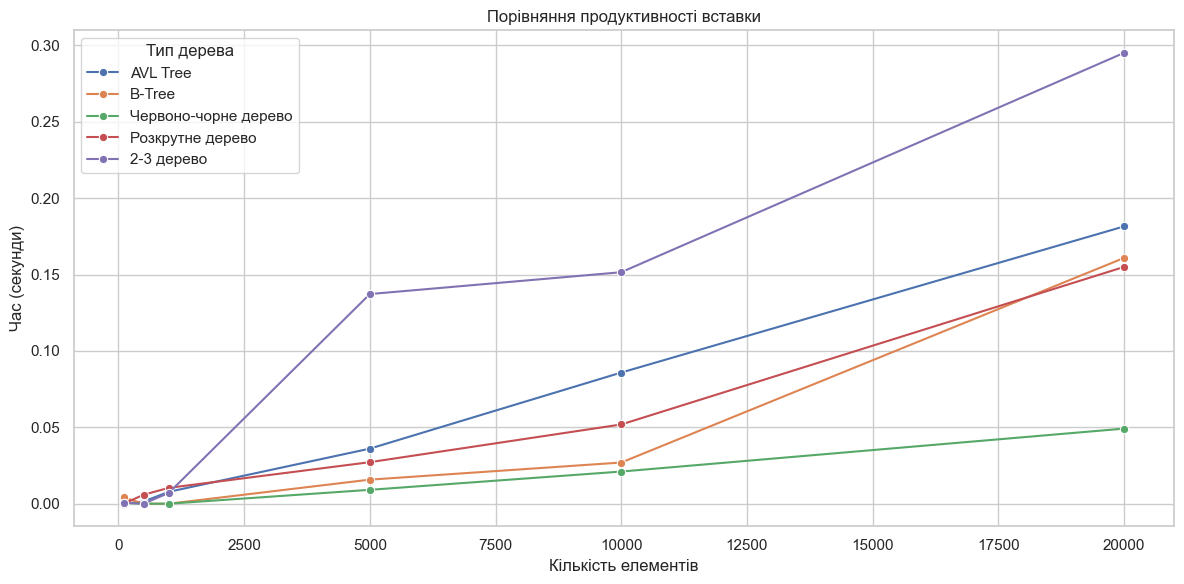

In [24]:
for size in sizes:
    data = random.sample(range(1, size*10), size)

    for tree_class, constructor_args, name in tree_classes:
        time_taken = measure_insertion_time(tree_class, data, constructor_args)

        if name not in insertion_results:
            insertion_results[name] = {}
        insertion_results[name][size] = time_taken

insertion_df = pd.DataFrame(insertion_results)
insertion_df.index.name = 'Розмір'
insertion_df.reset_index(inplace=True)

insertion_melted = pd.melt(insertion_df, id_vars=['Розмір'], var_name='Тип дерева', value_name='Час (с)')

plt.figure(figsize=(12, 6))
sns.lineplot(data=insertion_melted, x='Розмір', y='Час (с)', hue='Тип дерева', marker='o')
plt.title('Порівняння продуктивності вставки')
plt.xlabel('Кількість елементів')
plt.ylabel('Час (секунди)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Продуктивність пошуку

Зараз виміряємо продуктивність пошуку для кожної реалізації дерева.

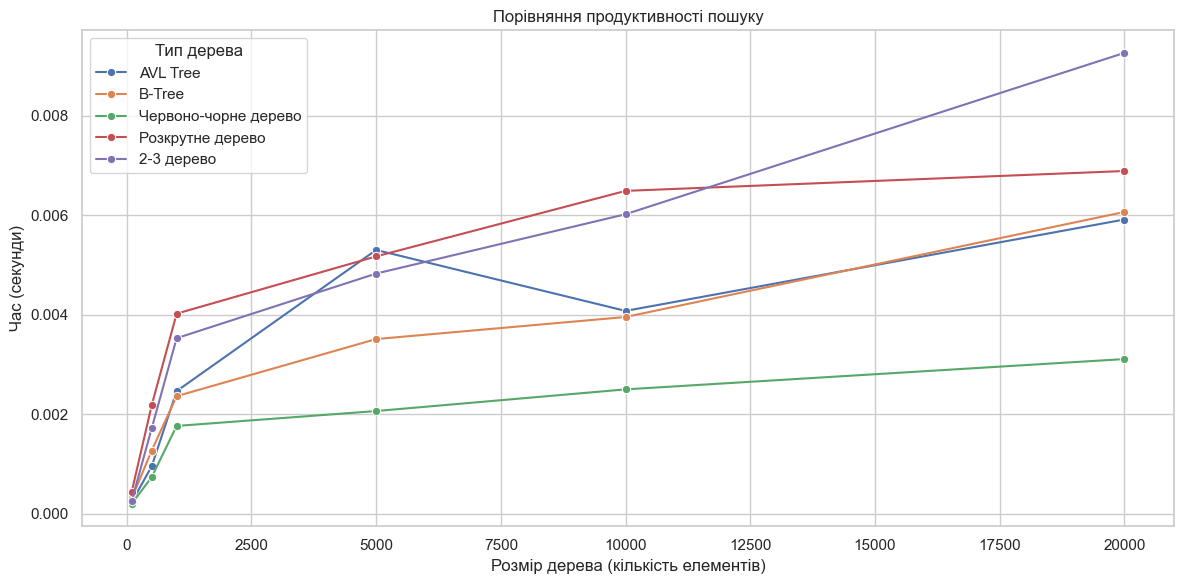

In [13]:
for size in sizes:
    data_to_insert = random.sample(range(1, size*10), size)
    
    search_size = min(1000, size)
    existing_data = random.sample(data_to_insert, search_size // 2)
    non_existing_data = random.sample([x for x in range(1, size*10) if x not in data_to_insert], search_size // 2)
    data_to_search = existing_data + non_existing_data
    random.shuffle(data_to_search)
    
    for tree_class, constructor_args, name in tree_classes:
        time_taken = measure_search_time(tree_class, data_to_insert, data_to_search, constructor_args)
        
        if name not in search_results:
            search_results[name] = {}
        search_results[name][size] = time_taken

search_df = pd.DataFrame(search_results)
search_df.index.name = 'Розмір'
search_df.reset_index(inplace=True)

search_melted = pd.melt(search_df, id_vars=['Розмір'], var_name='Тип дерева', value_name='Час (с)')

plt.figure(figsize=(12, 6))
sns.lineplot(data=search_melted, x='Розмір', y='Час (с)', hue='Тип дерева', marker='o')
plt.title('Порівняння продуктивності пошуку')
plt.xlabel('Розмір дерева (кількість елементів)')
plt.ylabel('Час (секунди)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Продуктивність видалення

Виміряємо продуктивність видалення для кожної реалізації дерева.

Skipping B-Tree deletion benchmark (known implementation issues)
Skipping 2-3 дерево deletion benchmark (known implementation issues)
Skipping B-Tree deletion benchmark (known implementation issues)
Skipping 2-3 дерево deletion benchmark (known implementation issues)
Skipping B-Tree deletion benchmark (known implementation issues)
Skipping 2-3 дерево deletion benchmark (known implementation issues)
Skipping B-Tree deletion benchmark (known implementation issues)
Skipping 2-3 дерево deletion benchmark (known implementation issues)
Skipping B-Tree deletion benchmark (known implementation issues)
Skipping 2-3 дерево deletion benchmark (known implementation issues)
Skipping B-Tree deletion benchmark (known implementation issues)
Skipping 2-3 дерево deletion benchmark (known implementation issues)


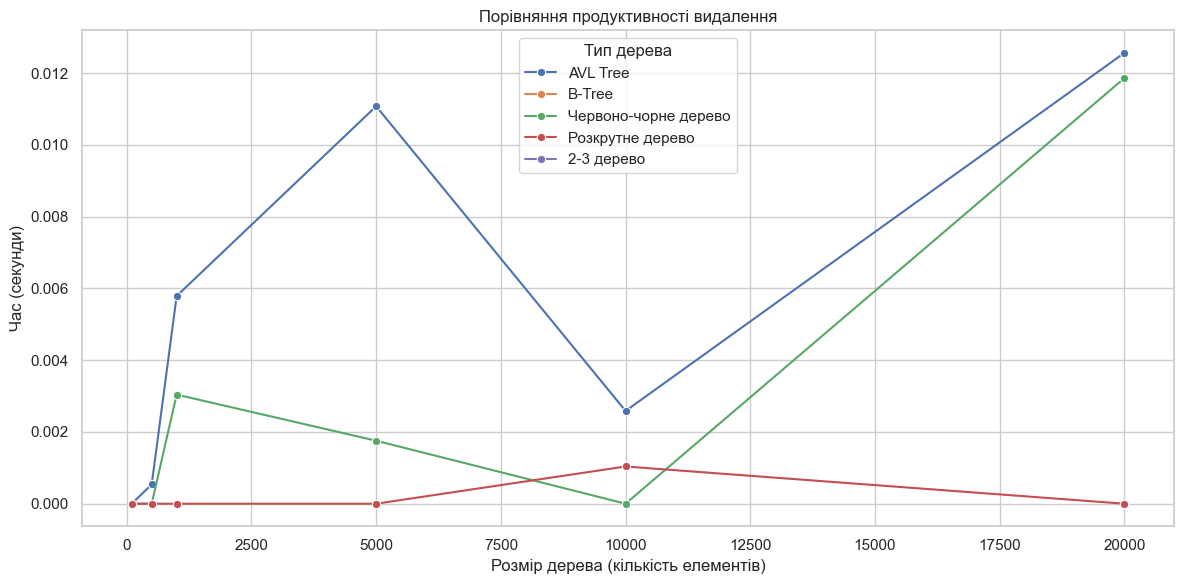

In [ ]:
deletion_results = {}

for size in sizes:
    data_to_insert = random.sample(range(1, size*10), size)
    delete_size = min(1000, size)
    data_to_delete = random.sample(data_to_insert, delete_size)

    for tree_class, constructor_args, name in tree_classes:
        if name in ["B-Tree", "2-3 дерево"]:
            print(f"Skipping {name} deletion benchmark (known implementation issues)")
            if name not in deletion_results:
                deletion_results[name] = {}
            deletion_results[name][size] = np.nan
            continue
            
        try:
            time_taken = measure_deletion_time(tree_class, data_to_insert, data_to_delete, constructor_args)
            if name not in deletion_results:
                deletion_results[name] = {}
            deletion_results[name][size] = time_taken
        except Exception as e:
            print(f"Error with {name} for size {size}: {type(e).__name__}: {e}")
            if name not in deletion_results:
                deletion_results[name] = {}
            deletion_results[name][size] = np.nan

deletion_df = pd.DataFrame(deletion_results)
deletion_df.index.name = 'Розмір'
deletion_df.reset_index(inplace=True)

deletion_melted = pd.melt(deletion_df, id_vars=['Розмір'], var_name='Тип дерева', value_name='Час (с)')

plt.figure(figsize=(12, 6))
sns.lineplot(data=deletion_melted, x='Розмір', y='Час (с)', hue='Тип дерева', marker='o')
plt.title('Порівняння продуктивності видалення')
plt.xlabel('Розмір дерева (кількість елементів)')
plt.ylabel('Час (секунди)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Продуктивність обходу

Виміряємо продуктивність обходу для кожної реалізації дерева (в-порядку та перед-порядком).

In [53]:

fixed_size = 10000
test_data = random.sample(range(1, fixed_size*10), fixed_size)

for tree_class, constructor_args, name in tree_classes:
    time_taken, _ = measure_traversal_time(tree_class, test_data, 'inorder', constructor_args)
    inorder_results[name] = time_taken

    time_taken, _ = measure_traversal_time(tree_class, test_data, 'preorder', constructor_args)
    preorder_results[name] = time_taken

traversal_df = pd.DataFrame({
    'Тип дерева': list(inorder_results.keys()) + list(preorder_results.keys()),
    'Час (с)': list(inorder_results.values()) + list(preorder_results.values()),
    'Тип обходу': ['В-порядку'] * len(inorder_results) + ['Перед-порядком'] * len(preorder_results)
})

plt.figure(figsize=(14, 7))
sns.barplot(data=traversal_df, x='Тип дерева', y='Час (с)', hue='Тип обходу')
plt.title(f'Порівняння продуктивності обходу (розмір дерева: {fixed_size})')
plt.xlabel('Тип дерева')
plt.ylabel('Час (секунди)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AttributeError: 'TwoThreeTree' object has no attribute 'inorder_traversal'

## Комбінований аналіз

Створимо комбіновану візуалізацію для порівняння всіх типів дерев за всіма операціями.

In [ ]:

largest_size = max(sizes)

operations_df = pd.DataFrame({
    'Тип дерева': [],
    'Операція': [],
    'Час (с)': []
})

for tree_type, data in insertion_results.items():
    operations_df = pd.concat([operations_df, pd.DataFrame({
        'Тип дерева': [tree_type],
        'Операція': ['Вставка'],
        'Час (с)': [data[largest_size]]
    })])

for tree_type, data in search_results.items():
    operations_df = pd.concat([operations_df, pd.DataFrame({
        'Тип дерева': [tree_type],
        'Операція': ['Пошук'],
        'Час (с)': [data[largest_size]]
    })])

for tree_type, data in deletion_results.items():
    operations_df = pd.concat([operations_df, pd.DataFrame({
        'Тип дерева': [tree_type],
        'Операція': ['Видалення'],
        'Час (с)': [data[largest_size]]
    })])

plt.figure(figsize=(15, 8))
sns.barplot(data=operations_df, x='Тип дерева', y='Час (с)', hue='Операція')
plt.title(f'Порівняння продуктивності операцій (розмір дерева: {largest_size})')
plt.xlabel('Тип дерева')
plt.ylabel('Час (секунди)')
plt.xticks(rotation=45)
plt.legend(title='Операція', loc='upper right')
plt.tight_layout()
plt.show()

## Аналіз швидкості зростання

Візуалізуємо, як зростає часова складність кожного дерева зі збільшенням розміру вхідних даних.

In [ ]:
growth_rates = {}

smallest_size = min(sizes)

for tree_type, data in insertion_results.items():
    base_time = data[smallest_size]
    growth_rates[tree_type] = {size: data[size] / base_time for size in sizes}

growth_df = pd.DataFrame(growth_rates)
growth_df.index.name = 'Розмір'
growth_df.reset_index(inplace=True)

growth_melted = pd.melt(growth_df, id_vars=['Розмір'], var_name='Тип дерева', value_name='Відносний час')

theoretical_growth = pd.DataFrame({
    'Розмір': list(sizes) * 3,
    'Тип зростання': ['O(n)'] * len(sizes) + ['O(log n)'] * len(sizes) + ['O(n log n)'] * len(sizes),
    'Відносний час': [sizes[i] / smallest_size for i in range(len(sizes))] + 
                     [(np.log(sizes[i]) / np.log(smallest_size)) for i in range(len(sizes))] +
                     [(sizes[i] * np.log(sizes[i])) / (smallest_size * np.log(smallest_size)) for i in range(len(sizes))]
})

plt.figure(figsize=(14, 8))

sns.lineplot(data=growth_melted, x='Розмір', y='Відносний час', hue='Тип дерева', style='Тип дерева', 
             markers=True, linewidth=2, markersize=8)

sns.lineplot(data=theoretical_growth, x='Розмір', y='Відносний час', hue='Тип зростання', 
             style='Тип зростання', dashes=True, linewidth=1.5, alpha=0.7)

plt.title('Аналіз швидкості зростання для операції вставки')
plt.xlabel('Розмір дерева (кількість елементів)')
plt.ylabel('Відносний час (порівняно з найменшим розміром)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Висновки

На основі нашого порівняння продуктивності різних структур дерев, ми можемо зробити наступні висновки:

### Продуктивність вставки:
- **AVL Tree**: Підтримує строгий баланс, що може робити вставки повільнішими, але покращує продуктивність пошуку.
- **Червоно-чорне дерево**: Зазвичай працює краще, ніж AVL Trees для вставок через менш суворі вимоги до балансування.
- **B-Tree**: Ефективне для великих наборів даних, оскільки зменшує висоту дерева.
- **Розкрутне дерево**: Хороша продуктивність вставки, оскільки не підтримує строгий баланс.
- **2-3 дерево**: Подібне до B-дерев, але з простішою структурою.

### Продуктивність пошуку:
- **AVL Tree**: Відмінна продуктивність пошуку завдяки своїй збалансованій природі.
- **Червоно-чорне дерево**: Дуже хороша продуктивність пошуку, близька до AVL Trees.
- **B-Tree**: Ефективні пошуки, особливо для великих наборів даних.
- **Розкрутне дерево**: Може бути дуже ефективним для часто доступних елементів, але гірше для одноразових пошуків.
- **2-3 дерево**: Хороша продуктивність пошуку, схожа на B-дерева.

### Продуктивність видалення:
- Подібні шаблони до вставки з деякими варіаціями через операції ребалансування.

### Використання пам'яті та складність реалізації:
- **AVL Tree** і **Червоно-чорне дерево**: Більш складна реалізація через балансування.
- **B-Tree**: Більш складна структура, але ефективне використання пам'яті для великих наборів даних.
- **Розкрутне дерево**: Простіша реалізація без явного підтримання балансу.
- **2-3 дерево**: Складніше, ніж бінарні дерева, але простіше, ніж загальні B-дерева.

### Найкращі випадки використання:
- **AVL Tree**: Коли операції пошуку домінують і потрібен строгий баланс.
- **Червоно-чорне дерево**: Збалансоване дерево загального призначення з хорошою загальною продуктивністю.
- **B-Tree**: Для великих наборів даних, особливо коли вони зберігаються на диску.
- **Розкрутне дерево**: Коли шаблони доступу мають локальність (часто доступаються одні й ті самі елементи).
- **2-3 дерево**: Навчальні цілі та коли потрібна простіша альтернатива B-деревам.

Вибір структури дерева повинен базуватися на конкретних вимогах вашого додатку, враховуючи очікуваний розмір набору даних, частоту різних операцій і чи доступаються певні елементи частіше, ніж інші.